In [1]:
from appyter import magic 
magic.init(lambda _= globals: _())

In [2]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import pandas as pd
import umap
from pycombat import Combat
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
%%appyter hide_code
{% do SectionField(name='section0', 
                   title='Select Species', 
                   subtitle='Select the Species that you would like to view. Note that ') %}

{% do SectionField(name='section1', 
                   title='Select Mouse Gene', 
                   subtitle='Select the Mouse Gene that you would like to create a plot for') %}

{% do SectionField(name='section2', 
                   title ='Select Human Gene',
                   subtitle='Select the Human Gene that you would like to create a plot for ')%}

{% do SectionField(name='section3',
                  title='Model Selection',
                   subtitle='Customize which parts of the model you would like to view'
                  ) %}

In [4]:
%%appyter code_exec

SPECIES_CHOICE = {{ ChoiceField(name = 'SPECIES_CHOICE', label='Species Choice', choices={'Mouse':'1', 'Human':'2'}, default = "Human", section='section0')}}

```python

SPECIES_CHOICE = 2
```

In [5]:
%%appyter code_exec
MOUSE_GENE_CHOICE = {{ ChoiceField(name='MOUSE_GENE_CHOICE', label = 'Mouse Gene Choice', choices={'Gimd1': '7108',
 'Defb40': '4997',
 'Cyp2b9': '4610',
 'Cyp2d11': '4628',
 'Sult1d1': '28638',
 'Gm3470': '13281',
 'Gsta2': '17154',
 'Rhbg': '25962',
 'Gm13550': '8998',
 'Gsta1': '17153',
 'Entpd8': '5831',
 'Prss8': '24850',
 'Krt84': '19284',
 'Gm9458': '16649',
 'Tmem171': '29490',
 'Spink5': '28272',
 'Defb37': '4993',
 'Ces1e': '3618',
 '2610528J11Rik': '297',
 'Cyp2d34': '4632',
 'R3hdml': '25116',
 'Marcksl1-ps4': '20093',
 'Krt36': '19260',
 'Gm379': '13567',
 'Prm1': '24713',
 'Lrrc61': '19765',
 'Gpr25': '17002',
 'Dennd4b': '5023',
 'Pip5k1c': '24078',
 'Crkl': '4322',
 'Rhobtb2': '25975',
 'Sbf1': '26841',
 'Kcnab2': '18858',
 'Btbd11': '2642',
 'Dnajc27': '5240',
 'Nxpe3': '21818',
 'AC109138.1': '739',
 'Carns1': '2941',
 'Prkacb': '24654',
 'Rap1gds1': '25662',
 'Pitpnm1': '24092',
 'Pacs1': '23475',
 'Ap1m1': '1668',
 'Arc': '1787',
 'Rltpr': '26076',
 'Clcn6': '3858',
 'Madd': '19927',
 'Sugp1': '28627',
 'Cic': '3805'},  default = 'Defb40', section='section1')  }}

```python

MOUSE_GENE_CHOICE = 4997
```

In [6]:
%%appyter code_exec
HUMAN_GENE_CHOICE = {{ ChoiceField(name = 'HUMAN_GENE_CHOICE', label = 'Human Gene Choice',choices={'TXNIP': '33078',
 'MARVELD2': '15257',
 'HSPA8P5': '12275',
 'NODAL': '17389',
 'HSP90AA6P': '12239',
 'SMG1P4': '29870',
 'RPL7P11': '27897',
 'PRB3': '20419',
 'RPL23AP69': '27537',
 'RP11-621H8.2': '25624',
 'MANBA': '15127',
 'EIF3CL': '8575',
 'NXPE2': '17812',
 'BTG2': '3711',
 'RPL3P4': '27782',
 'ZNF285B': '34664',
 'NBEA': '16873',
 'MAB21L1': '15030',
 'PTENP1': '20856',
 'YWHAZP6': '34283',
 'RP11-309L24.6': '23646',
 'PSPHP1': '20827',
 'RP11-516A11.1': '25081',
 'RP11-544O24.2': '25219',
 'GPAT3': '10830',
 'CHRNA9': '5520',
 'DUSP5P1': '8196',
 'GRIN2A': '11026',
 'GBP5': '10378',
 'APLNR': '2534',
 'SYCP2': '30899',
 'THSD1': '31540',
 'AC079776.2': '973',
 'TSPAN18': '32824',
 'CPNE5': '6122',
 'CLEC1A': '5687',
 'MMP3': '15728',
 'APOC1': '2555',
 'IL27RA': '13049',
 'SLCO2A1': '29780',
 'CTD-2370N5.3': '6903',
 'ARSI': '2838',
 'MGAT5B': '15581',
 'C3ORF36': '4096',
 'LLNLF-176F2.1': '14669',
 'ELFN1': '8678',
 'COX6A1P2': '6050',
 'IFNW1': '12496',
 'MATN2': '15274'}, default = 'MARVELD2', section = 'section2' )}}

```python

HUMAN_GENE_CHOICE = 15257
```

In [13]:
%%appyter code_exec
SPLINE_DEGREE = {{ 
    IntField(name='SPLINE_DEGREE',
             label='Choose Spline Degree',
             default= 2,
             min=0,
             max=5,
             section='section3'
    
            )}}

```python

SPLINE_DEGREE = 2
```

In [7]:
if SPECIES_CHOICE == 1:
    AWS_URL = 'http://appyters.maayanlab.cloud/storage/Age_Expression_Appyter/mouseagedataframe.csv'
    GENE_CHOICE = MOUSE_GENE_CHOICE
elif SPECIES_CHOICE == 2:
    AWS_URL = 'http://appyters.maayanlab.cloud/storage/Age_Expression_Appyter/humanagedata.csv'
    GENE_CHOICE = HUMAN_GENE_CHOICE
AGE_DF = pd.read_csv(AWS_URL)
if 'Unnamed: 0' in AGE_DF.columns:
    AGE_DF = AGE_DF.drop('Unnamed: 0', axis = 1)

AGE_DF

,0,1,2,3,4,5,6,7,8,9,...,35230,35231,35232,35233,35234,35235,35236,35237,GSMS,AGE (YEARS)
0,160,1,118,3,0,0,337,4,906,1002,...,0,0,1,0,0,1,9,0,GSM3124560,1.000000
1,174,5,67,1,0,0,216,2,586,609,...,0,0,0,0,0,1,7,0,GSM3124561,12.000000
2,218,2,44,2,0,0,525,6,877,695,...,0,0,0,0,0,0,0,0,GSM3124562,24.000000
3,151,5,120,4,1,0,468,0,544,717,...,0,0,0,0,0,0,1,0,GSM3124563,25.000000
4,119,2,45,2,0,0,482,13,523,319,...,0,0,0,0,0,0,9,0,GSM3124564,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,155,2,160,1,0,0,547,3,470,535,...,0,0,0,1,0,7,13,0,GSM3124579,8.500000
139,209,1,185,1,0,0,867,0,894,810,...,0,0,0,2,0,3,7,0,GSM3124580,6.916667
140,227,0,239,7,0,1,469,1,708,669,...,0,0,0,0,0,5,0,0,GSM3124581,5.000000
141,100,0,6,2,0,0,295,0,400,452,...,0,0,0,0,0,0,2,0,GSM3124582,8.833333


In [9]:
if SPECIES_CHOICE == 1:
    age = 'age'
else:
    age = 'AGE (YEARS)'
MEAN_DF = AGE_DF.groupby(age).mean().reset_index()

## Age-Expression Curve

In [14]:
#%% appyter code_exec
data_x = MEAN_DF[age]
data_y = MEAN_DF[str(GENE_CHOICE)]


train_x, valid_x, train_y, valid_y = train_test_split(data_x,data_y,test_size=0.33)
weights = np.polyfit(train_x,train_y,SPLINE_DEGREE)
model = np.poly1d(weights)
xp = np.linspace(valid_x.min(),valid_x.max())
pred = model(valid_x)
pred_plot = model(xp)

rolling_mean = MEAN_DF.rolling(window=3).mean()

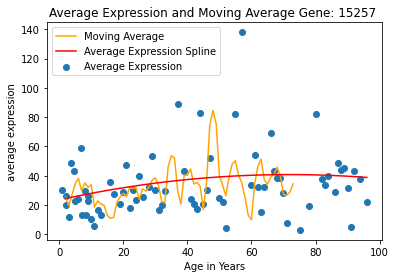

In [28]:
#%%appyter code_exec
plt.scatter(MEAN_DF[age], MEAN_DF[str(GENE_CHOICE)])
rolling_mean[str(GENE_CHOICE)].plot(legend=True,color='orange' )
plt.plot(xp,pred_plot, color = 'red')
if SPECIES_CHOICE == 1:
    plt.xlabel('Age in Weeks')
else:
    plt.xlabel('Age in Years')
plt.ylabel('Average Expression')
plt.title(f'Average Expression and Moving Average Gene: {GENE_CHOICE} ')
label = ['Moving Average', 'Average Expression Spline', 'Average Expression']
plt.legend(label)
plt.show()

## PCA for the Dataset

In [20]:
PCA_DF = AGE_DF.drop([age,'GSMS'] , axis = 1)


In [21]:
data = PCA_DF.to_numpy()
for x in range(len(data)):
    for y in range(len(data[x])):
        data[x][y] = np.log2(data[x][y] + 1)


In [23]:
trans1 = pd.DataFrame(data)

pca = PCA(n_components = 2)
qt = QuantileTransformer(output_distribution='normal')

/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (143). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Text(0, 0.5, 'Second Principal Component')

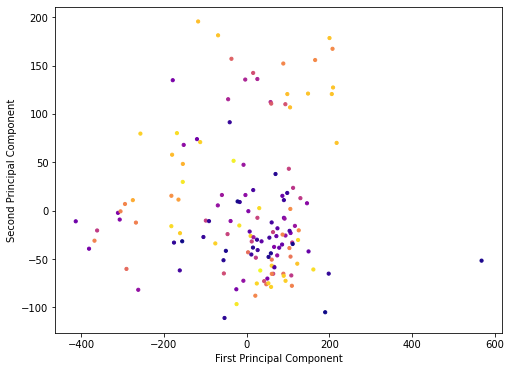

In [25]:
data_trans = qt.fit_transform(trans1)
pca.fit(data_trans)
x_pca = pca.transform(data_trans)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

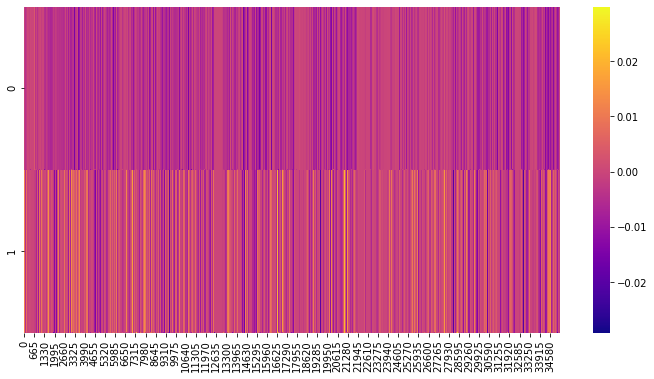

In [26]:
df_comp_5 = pd.DataFrame(pca.components_)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp_5, cmap='plasma')

## T-SNE for the Dataset

In [24]:
tsne = TSNE(n_components=2, perplexity=35, learning_rate=250)

In [25]:
pca.explained_variance_ratio_

array([0.303319  , 0.07258581])

Text(0, 0.5, 'TSNE 2D-Two')

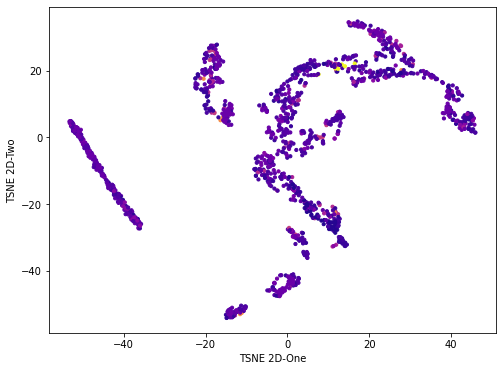

In [27]:
pca_df = pd.DataFrame(x_pca)
tsne_results = tsne.fit_transform(pca_df)

plt.figure(figsize=(8,6))
plt.scatter(tsne_results[:,0], tsne_results[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
plt.xlabel('TSNE 2D-One')
plt.ylabel('TSNE 2D-Two')

## Batch Effect Removal with PyCombat

/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/pycombat/pycombat.py:156: RuntimeWarning: invalid value encountered in true_divide
  change = max((abs(gam_post - gam_prior) / gam_prior).max(),
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/pycombat/pycombat.py:157: RuntimeWarning: divide by zero encountered in true_divide
  (abs(del_sq_post - del_sq_prior) / del_sq_prior).max())


Text(0, 0.5, 'Batch Effect Removal')

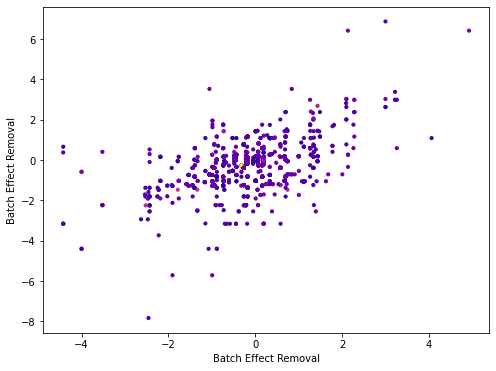

In [32]:
combat = Combat()
c_dat = combat.fit_transform(data_trans[:,:32543],data_trans[:,32543])

plt.figure(figsize=(8,6))
plt.scatter(c_dat[:,0], c_dat[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
plt.xlabel('Batch Effect Removal')
plt.ylabel('Batch Effect Removal')
plt.title('Batch Effect Removed Data for Mouse Age Data')

## UMAP Plot

Text(0, 0.5, 'UMAP Second Component')

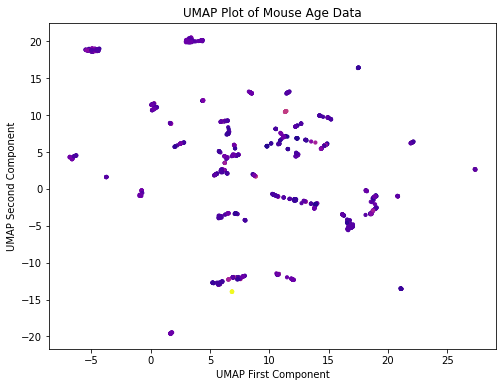

In [43]:
reducer = umap.UMAP()

embedding = reducer.fit_transform(data_trans)

plt.figure(figsize=(8,6))
plt.scatter(embedding[:,0], embedding[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
plt.title('UMAP Plot of Mouse Age Data')
plt.xlabel('UMAP First Component')
plt.ylabel('UMAP Second Component')